# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [57]:
m=1
run = 1

1

Choose your grid

In [58]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false#true

global source=false

false

In [59]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [77]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [78]:
print(N)

400.0

In [79]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [80]:
using Printf
include("./TMYangMillsTHREE.jl");

In [81]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.00125


# Initial data of m β Ψ and Ψ,x

In [82]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
#A=0.0886#0.08865958683658391#0.0884375
A=0.089
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

In [83]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×3 Matrix{Float64}:
 0.0          0.0          0.0
 1.21678e-11  3.16704e-9   3.19742e-8
 3.32295e-11  5.59103e-9   7.44274e-8
 6.48309e-11  8.02099e-9   1.29867e-7
 1.1216e-10   1.08774e-8   2.01318e-7
 1.82831e-10  1.4461e-8    2.92414e-7
 2.87961e-10  1.9107e-8    4.07512e-7
 4.43698e-10  2.52411e-8   5.51821e-7
 6.73366e-10  3.34261e-8   7.31551e-7
 1.01049e-9   4.44152e-8   9.54088e-7
 1.50303e-9   5.92203e-8   1.2282e-6
 2.21923e-9   7.92012e-8   1.56425e-6
 3.25581e-9   1.06183e-7   1.97449e-6
 ⋮                        
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e-13
 0.106016     0.417111    -2.18267e

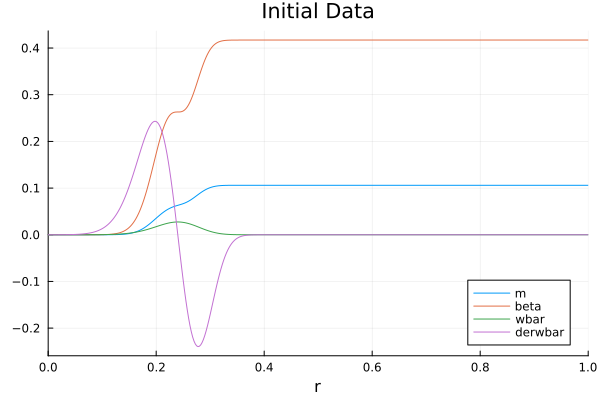

In [84]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

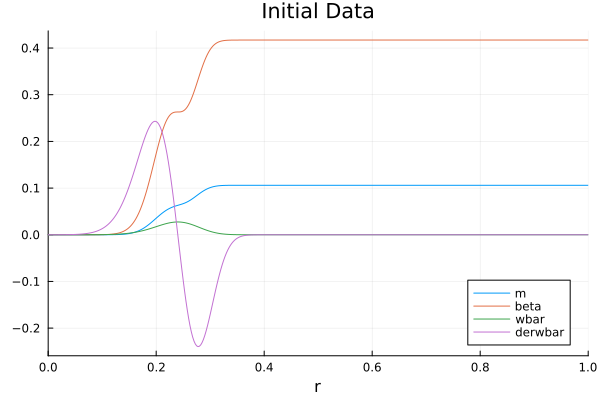

In [85]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [86]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [87]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [88]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [89]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.40200752643546506


In [90]:
using Base.Threads
Threads.nthreads()

4

In [91]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.4716804511968149

In [92]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [93]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 0.0005025105098764937, t=0.2512547709607161 speed is 0.49750203246782765, dx/dt=4.975020324678276


iteration 1000 dt is 0.0004067175002191648, t=0.4923800348745705 speed is 0.6146772633714663, dx/dt=6.146772633714663


iteration 1500 dt is 0.00026451254271832797, t=0.659750862457638 speed is 0.9451347653718564, dx/dt=9.451347653718562
Supercritical evolution! At time 0.7068098396315553, iteration = 1701
t = 0.7068098396315553iteration 1701 monitor ratio = 0.7103017108093888
